In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import bootstrap
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


## Poverty

In [2]:
#loading poverty data
poverty_df = pd.read_csv('data/poverty.csv')
#print(poverty_df)

In [3]:
#loading poverty data
poverty_df = pd.read_csv('data/poverty.csv')
#print(poverty_df)
#cleaning the first few rows that are just words
poverty_df = poverty_df.drop([0, 1])

poverty_df.rename(columns={'Unnamed: 0':'State',
                           'Unnamed: 1': 'TotalPop',
                           'Unnamed: 2':'PovertyTotal',
                           'Unnamed: 3':'Margin_1',
                           'Unnamed: 4': 'PovertyPercent',
                           'Unnamed: 5': "Margin_2"}, inplace=True)
#print(poverty_df.columns)
#cutting off any row that is not between 2013 and 2018
index_2018 = poverty_df[poverty_df['State'] == '2018'].index[0]
index_2017 = poverty_df[poverty_df['State'] == '2017 (3)'].index[0]
#print(index_2018)
#print(index_2017)


In [4]:
poverty_2018 = poverty_df[index_2018:index_2017-2]
#print(poverty_2018.head())
#print(poverty_2018.tail())

In [5]:
index_2017 = poverty_df[poverty_df['State'] == '2017'].index[0]
index_2016 = poverty_df[poverty_df['State'] == '2016'].index[0]
#print(index_2017)
#print(index_2016)
poverty_2017 = poverty_df[index_2017:index_2016-2]
#print(poverty_2017.tail())

In [6]:
index_2015 = poverty_df[poverty_df['State'] == '2015'].index[0]

poverty_2016 = poverty_df[index_2016:index_2015-2]
#print(poverty_2016.head())
#print(poverty_2016.tail())

In [7]:
index_2014 = poverty_df[poverty_df['State'] == '2014'].index[0]

poverty_2015 = poverty_df[index_2015:index_2014-2]
#print(poverty_2015.head())
#print(poverty_2015.tail())

In [8]:
index_2013 = poverty_df[poverty_df['State'] == '2013 (4)'].index[0]
poverty_2014 = poverty_df[index_2014:index_2013-2]
#print(poverty_2014.head())
#print(poverty_2014.tail())

In [9]:
index_2013 = poverty_df[poverty_df['State'] == '2013 (5)'].index[0]
index_2012 = poverty_df[poverty_df['State'] == '2012'].index[0]
poverty_2013 = poverty_df[index_2013:index_2012-2]
#print(poverty_2013.head())
#print(poverty_2013.tail())

In [10]:
poverty_2018 = poverty_2018.copy()
poverty_2018['Year'] = 2018
poverty_2017 = poverty_2017.copy()
poverty_2017['Year'] = 2017
poverty_2016= poverty_2016.copy()
poverty_2016['Year'] = 2016
poverty_2015 = poverty_2015.copy()
poverty_2015['Year'] = 2015
poverty_2014 = poverty_2014.copy()
poverty_2014['Year'] = 2014
poverty_2013 = poverty_2013.copy()
poverty_2013['Year'] = 2013

poverty_concat = pd.concat([poverty_2013, poverty_2014, poverty_2015, \
                            poverty_2016, poverty_2017, poverty_2018], axis=0)
poverty_concat.reset_index(inplace=True, drop=True)
poverty_concat = poverty_concat.drop(columns = {"Margin_1", "Margin_2"})
print(poverty_concat)


             State TotalPop PovertyTotal PovertyPercent  Year
0          Alabama    4,751          796           16.7  2013
1           Alaska      696           76           10.9  2013
2          Arizona    6,645        1,345           20.2  2013
3         Arkansas    2,940          504           17.1  2013
4       California   38,050        5,675           14.9  2013
..             ...      ...          ...            ...   ...
301       Virginia    8,393          821            9.8  2018
302     Washington    7,555          647            8.6  2018
303  West Virginia    1,762          279           15.9  2018
304      Wisconsin    5,795          499            8.6  2018
305        Wyoming      565           53            9.5  2018

[306 rows x 5 columns]


In [11]:
poverty_concat['PovertyTotal'] = poverty_concat.PovertyTotal.str.replace(",", '').astype(int)
poverty_concat['PovertyPercent'] = poverty_concat['PovertyPercent'].astype(float)
poverty_concat['TotalPop'] = poverty_concat.TotalPop.str.replace(",", '').astype(int)
poverty_concat.dtypes

State              object
TotalPop            int64
PovertyTotal        int64
PovertyPercent    float64
Year                int64
dtype: object

In [12]:
poverty_concat.head()

,State,TotalPop,PovertyTotal,PovertyPercent,Year
0,Alabama,4751,796,16.7,2013
1,Alaska,696,76,10.9,2013
2,Arizona,6645,1345,20.2,2013
3,Arkansas,2940,504,17.1,2013
4,California,38050,5675,14.9,2013


## Income 1984-2018

In [13]:
income_df = pd.read_csv("data/income.csv")
income_df.iloc[:, 20:].head(5)


,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2010 (37),NaN,2009 (36),NaN,2008,NaN,2007,NaN,2006,...,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
4,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror


In [14]:
income_df.drop(columns={'Unnamed: 12','Unnamed: 10','Unnamed: 8',\
                        'Unnamed: 6', 'Unnamed: 4', 'Unnamed: 2' , 'Unnamed: 3',\
                          'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20',\
                            'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 30',
                            'Unnamed: 32', 'Unnamed: 34', 'Unnamed: 36',\
                            'Unnamed: 38', 'Unnamed: 40', 'Unnamed: 42', 'Unnamed: 44', 'Unnamed: 46',\
                              'Unnamed: 48', 'Unnamed: 50', 'Unnamed: 52', 'Unnamed: 54',\
                                'Unnamed: 56', 'Unnamed: 58', 'Unnamed: 60', 'Unnamed: 62',\
                                  'Unnamed: 64', 'Unnamed: 66', 'Unnamed: 68', 'Unnamed: 70',\
                                    'Unnamed: 72', 'Unnamed: 74'}, inplace=True)
(income_df.iloc[3:, :]).head()

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [15]:
income_df = income_df.iloc[3:, :]
income_df.head()

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [16]:
income_df.iloc[:, 5:]

,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,"53,657","53,585","51,939","51,017","50,054","49,276","49,777","50,303","50,233","48,201",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,"42,278","47,320","41,381","43,464","42,590","40,933","39,980","44,476","42,212","37,952",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,"67,629","72,472","61,137","63,648","57,431","57,848","61,604","63,989","62,993","56,418",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"61,665","55,849","59,663","58,159","58,248","58,114","60,112","59,860","62,253","64,536",...,"54,511","58,598","56,134","57,387","57,103","60,525","55,913","57,970","51,879","47,882"
111,"59,128","72,817","60,140","63,016","60,991","60,249","61,559","62,359","59,178","58,730",...,"50,523","53,146","52,378","55,050","57,884","54,066","58,502","51,673","49,279","54,976"
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
income_df.rename(columns = {'Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61':'State',
                            'Unnamed: 1': '2018', 'Unnamed: 5': '2017',\
                            'Unnamed: 7': '2016', 'Unnamed: 9': '2015' , \
                                'Unnamed: 11': '2014', 'Unnamed: 13': '2013',\
                                   'Unnamed: 15': '2013', 'Unnamed: 17': '2012', 'Unnamed: 19': '2011', \
                                     'Unnamed: 21': '2010', 'Unnamed: 23': '2009', 'Unnamed: 25': '2008',\
                                         'Unnamed: 27': '2007', 'Unnamed: 29': '2006', 'Unnamed: 31': '2005',\
                                              'Unnamed: 33': '2004', 'Unnamed: 35': '2003', 'Unnamed: 37': '2002', 'Unnamed: 39': '2001',\
                                                  'Unnamed: 41': '2000', 'Unnamed: 43': '1999', 'Unnamed: 45': '1998', \
                                                      'Unnamed: 47': '1997', 'Unnamed: 49': '1996', 'Unnamed: 51': '1995',\
                                                          'Unnamed: 53': '1994', 'Unnamed: 55': '1993', 'Unnamed: 57': '1992',\
                                                              'Unnamed: 59': '1991', 'Unnamed: 61': '1990', 'Unnamed: 63': '1989'}, inplace=True)
income_df.rename(columns = {'Unnamed: 65': '1988', 'Unnamed: 67': '1987', 'Unnamed: 69': '1986', 'Unnamed: 71': '1985',\
                            'Unnamed: 73': '1984'}, inplace=True)
income_df.reset_index(inplace=True, drop= True)
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
1,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
2,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
3,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
4,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [18]:
income_df = income_df.iloc[3:54, :]
income_df.reset_index(inplace=True, drop = True)
#print(income_df.head())
income_df.head(7)

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
1,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
2,Arizona,"62,283","61,125","57,100","52,248","49,254","52,611","50,602","47,044","48,621",...,"30,510","29,358","30,737","29,224","28,552","26,435","26,749","25,500","23,877","21,425"
3,Arkansas,"49,781","48,829","45,907","42,798","44,922","39,376","39,919","39,018","41,302",...,"23,039","23,882","23,435","22,786","21,433","20,172","18,827","18,730","17,451","15,674"
4,California,"70,489","69,759","66,637","63,636","60,487","60,794","57,528","57,020","53,367",...,"34,073","34,903","33,664","33,290","33,009","30,287","30,146","29,010","26,981","25,287"
5,Colorado,"73,034","74,172","70,566","66,596","60,940","67,912","63,371","57,255","58,629",...,"34,488","32,484","31,499","30,733","26,806","26,214","26,476","27,192","28,182","25,801"
6,Connecticut,"72,812","72,780","75,923","72,889","70,161","69,291","67,781","64,247","65,415",...,"39,516","40,841","42,154","38,870","42,321","36,213","32,862","32,721","31,090","29,951"


In [19]:
income_df.tail(7)

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
44,Utah,"77,067","71,319","67,481","66,258","63,383","61,047","62,967","58,341","55,493",...,"35,786","34,251","28,016","30,142","30,717","26,313","26,529","26,281","25,238","23,057"
45,Vermont,"70,066","63,805","60,837","59,494","60,708","65,513","54,842","55,582","51,862",...,"31,065","32,755","29,155","31,098","31,295","28,988","25,415","24,599","26,000","22,578"
46,Virginia,"77,151","71,293","66,451","61,486","66,155","65,907","67,620","64,632","62,616",...,"36,433","38,198","36,137","35,073","34,118","32,648","29,996","29,715","28,429","26,525"
47,Washington,"79,726","75,418","70,310","67,243","59,068","63,922","60,106","62,187","56,850",...,"35,655","33,900","33,970","32,112","31,961","32,327","27,319","26,881","24,000","25,017"
48,West Virginia,"50,573","45,392","44,354","42,824","39,552","43,069","40,241","43,553","41,821",...,"22,421","20,271","23,147","22,137","21,677","19,353","17,207","16,464","15,983","16,843"
49,Wisconsin,"62,629","63,451","59,817","55,425","58,080","51,726","55,258","53,079","52,058",...,"31,766","33,308","31,133","30,711","29,123","29,575","26,369","26,430","23,246","20,743"
50,Wyoming,"62,539","57,837","57,829","60,925","55,690","67,441","55,700","57,512","54,509",...,"29,442","30,209","29,050","29,460","29,521","26,419","27,590","23,559","22,081","23,816"


In [20]:
income_df = income_df.replace(',', '', regex = True)
for c in (income_df.columns.array)[1:]:
  income_df[c] = income_df[c].astype(float)
#income_df.dtypes
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,49936.0,51113.0,47221.0,44509.0,42278.0,47320.0,41381.0,43464.0,42590.0,...,25082.0,25808.0,24346.0,23357.0,21284.0,19948.0,19734.0,19132.0,18333.0,17310.0
1,Alaska,68734.0,72231.0,75723.0,75112.0,67629.0,72472.0,61137.0,63648.0,57431.0,...,42931.0,41802.0,40612.0,39298.0,36006.0,33103.0,33233.0,31356.0,34782.0,32356.0
2,Arizona,62283.0,61125.0,57100.0,52248.0,49254.0,52611.0,50602.0,47044.0,48621.0,...,30510.0,29358.0,30737.0,29224.0,28552.0,26435.0,26749.0,25500.0,23877.0,21425.0
3,Arkansas,49781.0,48829.0,45907.0,42798.0,44922.0,39376.0,39919.0,39018.0,41302.0,...,23039.0,23882.0,23435.0,22786.0,21433.0,20172.0,18827.0,18730.0,17451.0,15674.0
4,California,70489.0,69759.0,66637.0,63636.0,60487.0,60794.0,57528.0,57020.0,53367.0,...,34073.0,34903.0,33664.0,33290.0,33009.0,30287.0,30146.0,29010.0,26981.0,25287.0


In [21]:
income_melt = pd.melt(income_df, id_vars = 'State', var_name = 'Year', value_name='Median_Income')
income_melt

,State,Year,Median_Income
0,Alabama,2018,49936.0
1,Alaska,2018,68734.0
2,Arizona,2018,62283.0
3,Arkansas,2018,49781.0
4,California,2018,70489.0
...,...,...,...
1831,Virginia,1984,26525.0
1832,Washington,1984,25017.0
1833,West Virginia,1984,16843.0
1834,Wisconsin,1984,20743.0


# Unemployment

## Crime 1979-2022

In [22]:
job_df = pd.read_csv('emp_table.csv', header = 0)
job_df = job_df.loc[4:, :].reset_index(drop=True)
job_df = job_df.iloc[:, 1:]

job_df.rename(columns = {"Unnamed: 1": "Area"}, inplace = True)

count = 0
l = np.arange(1980, 2019)

for x in range(2, 41):
    job_df.rename(columns = {f"Unnamed: {x}": l[count]}, inplace = True)
    count += 1

job_df = job_df.loc[1:52,:] #ignore the row index 1 for United States
job_df.reset_index(drop=True, inplace=True)
job_df.head() #rows 0, 1, ...51

,Area,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,7.1,7.6,9.7,9.6,7.5,7.2,7.0,6.2,5.5,...,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9
1,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,7.2,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,8.8,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,6.4,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,7.6,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7


In [23]:
job_melt = pd.melt(job_df, id_vars = 'Area', var_name = 'Year', value_name='UnemploymentRate')
job_melt

,Area,Year,UnemploymentRate
0,United States,1980,7.1
1,Alabama,1980,8.9
2,Alaska,1980,9.6
3,Arizona,1980,6.6
4,Arkansas,1980,7.6
...,...,...,...
2023,Virginia,2018,3.0
2024,Washington,2018,4.5
2025,West Virginia,2018,5.3
2026,Wisconsin,2018,3.0


# CRIME

In [24]:
#loading crime data
crime_df = pd.read_csv('data/crime.csv')
crime_df.iloc[:, 2:]

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1,NaN,220099000,1208030,21460,76390,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
2,Alaska,406000,1994,54,292,NaN,445,1203,23193,5616,15076,2501,NaN
3,Alabama,3769000,15578,496,1037,NaN,4127,9918,144372,48517,83791,12064,NaN
4,Arkansas,2180000,7984,198,595,NaN,1626,5565,70949,21457,45267,4225,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,NaN,"8,715,698","20,589",520,NaN,"2,595","3,283","14,191","144,566","10,665","118,839","15,062",NaN
2333,NaN,"7,812,880","27,909",373,NaN,"2,917","6,416","18,203","225,535","37,583","134,730","53,222",NaN
2334,NaN,"1,770,071","4,699",87,NaN,823,199,"3,590","21,153","3,156","16,355","1,642",NaN
2335,NaN,"5,910,955","17,057",283,NaN,"2,156","2,285","12,333","71,929","7,619","54,374","9,936",NaN


In [25]:
#see what the names of each column are without any edits to the csv
print(crime_df.columns)

#rename the columns we want with proper names
crime_df.rename(columns={
    'estimated_crimes_1979_2023': 'Year',
    'Unnamed: 1': 'State_Abbreviation',
    'Unnamed: 2': 'State_Name',
    'Unnamed: 3': 'Population',
    'Unnamed: 4': 'Violent_Crime',
    'Unnamed: 5': 'Homicide',
    'Unnamed: 6': 'Rape',
    'Unnamed: 7': 'Rape_Revised',
    'Unnamed: 8': 'Robbery',
    'Unnamed: 9': 'Aggravated_Assault',
    'Unnamed: 10': 'Property_Crime',
    'Unnamed: 11': 'Burglary',
    'Unnamed: 12': 'Larceny',
    'Unnamed: 13': 'Vehicle_Theft',

},inplace=True)

#drop columns that will not be used during the analysis
crime_df = crime_df.drop(columns=['Unnamed: 14'])
crime_df

Index(['estimated_crimes_1979_2023', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Rape_Revised,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
1,1979,NaN,NaN,220099000,1208030,21460,76390,NaN,480700,629480,11041500,3327700,6601000,1112800
2,1979,AK,Alaska,406000,1994,54,292,NaN,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,NaN,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,NaN,1626,5565,70949,21457,45267,4225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,2023,VA,NaN,"8,715,698","20,589",520,NaN,"2,595","3,283","14,191","144,566","10,665","118,839","15,062"
2333,2023,WA,NaN,"7,812,880","27,909",373,NaN,"2,917","6,416","18,203","225,535","37,583","134,730","53,222"
2334,2023,WV,NaN,"1,770,071","4,699",87,NaN,823,199,"3,590","21,153","3,156","16,355","1,642"
2335,2023,WI,NaN,"5,910,955","17,057",283,NaN,"2,156","2,285","12,333","71,929","7,619","54,374","9,936"


In [26]:
#dropping the first row (index 0) and reset the indexes.
# This way, I can turn the year from object to integer.
crime_df = crime_df.drop(index=0)

In [27]:
#if rape_Revised is na, take rape
na_rape_values = crime_df['Rape'].loc[crime_df['Rape_Revised'].isna()] #put this into rape_revised

crime_df['Rape_Revised'] = crime_df['Rape_Revised'].fillna(na_rape_values)

crime_df = crime_df.drop(columns = ['Rape'])

crime_df.rename(columns= {'Rape_Revised':'Rape'}, inplace=True)
crime_df.head()

,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
1,1979,NaN,NaN,220099000,1208030,21460,76390,480700,629480,11041500,3327700,6601000,1112800
2,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457,45267,4225
5,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916,116976,12085


In [28]:
# Reset the index
crime_df.reset_index(drop=True, inplace=True)

#making the year into an interger from an object
crime_df['Year']=crime_df['Year'].astype(int)

#shaping the data set so that we are only looking at years 2013 to 2018
crime_filtered_years = crime_df[(crime_df['Year'] >= 1979)]

# Drop rows where 'State_Abbreviation' or 'State_Name' is NaN
crime_filtered_years = crime_filtered_years.dropna(subset=['State_Abbreviation', 'State_Name'])
crime_filtered_years.reset_index(inplace=True, drop = True)
crime_filtered_years

,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616,15076,2501
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517,83791,12064
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457,45267,4225
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916,116976,12085
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310,847148,167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,"8,683,619","20,624",641,"2,791","3,360","13,832","148,845","10,944","123,805","14,096"
2240,2022,WA,Washington,"7,785,786","29,504",400,"3,208","6,766","19,130","262,437","43,987","168,550","49,900"
2241,2022,WV,West Virginia,"1,775,156","5,213",95,909,210,"3,999","23,663","3,561","18,428","1,674"
2242,2022,WI,Wisconsin,"5,892,539","17,889",322,"2,452","2,350","12,765","80,703","9,137","58,211","13,355"


In [29]:
crime_filtered_years= crime_filtered_years.replace(',', '', regex = True)

In [30]:
#changing and ensuring the types for each column's data
crime_filtered_years['Population'] = crime_filtered_years['Population'].astype(int)
crime_filtered_years['Rape'] = crime_filtered_years['Rape'].astype(int)
crime_filtered_years['Robbery'] = crime_filtered_years['Robbery'].astype(int)
crime_filtered_years['Burglary'] = crime_filtered_years['Burglary'].astype(int)
crime_filtered_years['Aggravated_Assault'] = crime_filtered_years['Aggravated_Assault'].astype(int)
crime_filtered_years['Violent_Crime'] = crime_filtered_years['Violent_Crime'].astype(int)
crime_filtered_years['Property_Crime'] = crime_filtered_years['Violent_Crime'].astype(int)
crime_filtered_years['Homicide'] = crime_filtered_years['Homicide'].astype(int)
crime_filtered_years.dtypes

Year                   int64
State_Abbreviation    object
State_Name            object
Population             int64
Violent_Crime          int64
Homicide               int64
Rape                   int64
Robbery                int64
Aggravated_Assault     int64
Property_Crime         int64
Burglary               int64
Larceny               object
Vehicle_Theft         object
dtype: object

In [31]:
crime_filtered_years.rename(columns={'State_Name': 'State'}, inplace=True)
crime_df = crime_filtered_years
crime_df

,Year,State_Abbreviation,State,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,1979,AK,Alaska,406000,1994,54,292,445,1203,1994,5616,15076,2501
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,15578,48517,83791,12064
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,7984,21457,45267,4225
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,14528,48916,116976,12085
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,184087,496310,847148,167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,8683619,20624,641,2791,3360,13832,20624,10944,123805,14096
2240,2022,WA,Washington,7785786,29504,400,3208,6766,19130,29504,43987,168550,49900
2241,2022,WV,West Virginia,1775156,5213,95,909,210,3999,5213,3561,18428,1674
2242,2022,WI,Wisconsin,5892539,17889,322,2452,2350,12765,17889,9137,58211,13355


# Hypothesis 1:
### Income is a better predictor for robbery than burglary across the states

### Train model for predicting robbery using income

In [32]:
income_robbery = duckdb.sql('''SELECT  Robbery,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_robbery = pd.get_dummies(income_robbery,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_robbery.head()

,Robbery,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,547,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3833,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1587,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83924,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:],
                                   income_robbery['Robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()
#inc_rob_model.summary()

In [34]:
#make predictions
X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")

MAE for predicting robbery using income: 3903.309439874085
RSME for predicting robbery using income: 7759.480589023579


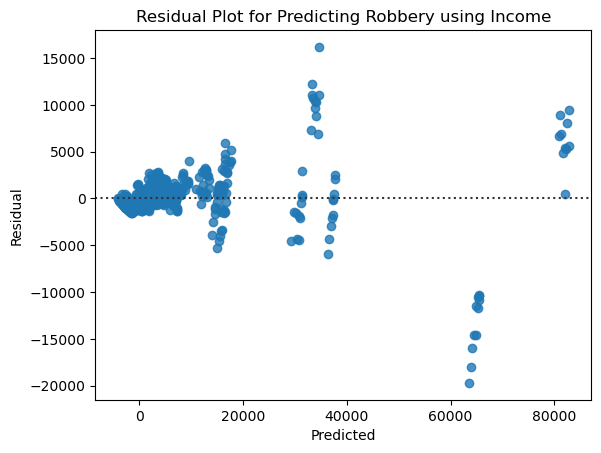

In [35]:

inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", title = "Residual Plot for Predicting Robbery using Income");

In [36]:
# for each of the states, get the predicted value and the actual value
X_inc_rob_test2 = X_inc_rob_test
X_inc_rob_test2['actual_robbery'] = y_inc_rob_test
X_inc_rob_test2['preds_robbery'] = inc_rob_preds
inc_rob_melt = pd.melt(X_inc_rob_test2, id_vars=['const','Year', 'Median_Income', 'actual_robbery','preds_robbery'], \
                       var_name = 'State', value_name='Binary')
inc_rob_melt = inc_rob_melt[ inc_rob_melt['Binary']==1]
inc_rob_melt.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
40,1.0,2010,57848.0,594,-1020.717185,Alaska,1
90,1.0,2011,57431.0,576,-1031.663756,Alaska,1
140,1.0,2012,63648.0,630,-1636.744371,Alaska,1
190,1.0,2013,61137.0,623,-1460.154511,Alaska,1
229,1.0,2013,72472.0,623,-2475.305156,Alaska,1


In [37]:
twenty_states = pd.DataFrame(np.random.choice(inc_rob_melt['State'], size =20, replace = False))
#print(twenty_states)
chosen_stats_robbery = duckdb.sql(''' SELECT * FROM inc_rob_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_robbery.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
0,1.0,2014,57522.0,1271,-1103.708690,Delaware,1
1,1.0,2015,57756.0,1240,-1172.958135,Delaware,1
2,1.0,2016,58046.0,1359,-1247.222881,Delaware,1
3,1.0,2017,62318.0,1082,-1678.111347,Delaware,1
4,1.0,2018,65012.0,861,-1967.675797,Delaware,1


# Preds vs Actual for 2016

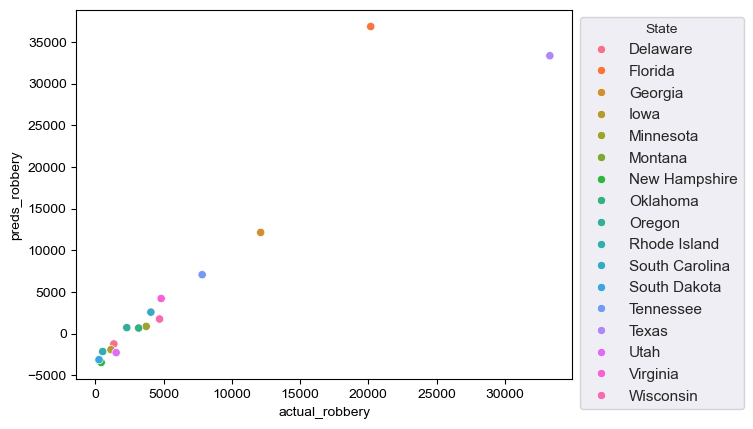

In [38]:
robbery_2016 = chosen_stats_robbery[chosen_stats_robbery['Year']==2016]
ax = sns.scatterplot(data = robbery_2016, x = 'actual_robbery', y = 'preds_robbery', hue = 'State')
sns.set_theme(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# Preds vs Actual for 2017

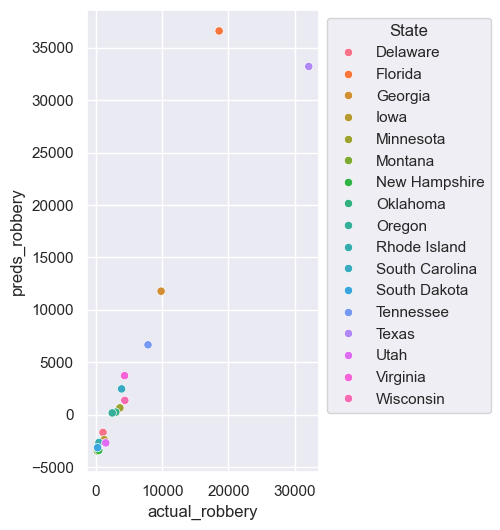

In [39]:
robbery_2017 = chosen_stats_robbery[chosen_stats_robbery['Year']==2017]
ax = sns.scatterplot(data = robbery_2017, x = 'actual_robbery', y = 'preds_robbery', hue = 'State')
sns.set(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Preds vs Actual for 2018

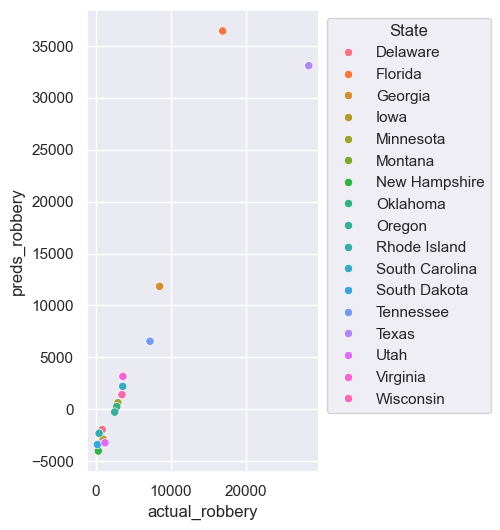

In [40]:
robbery_2018 = chosen_stats_robbery[chosen_stats_robbery['Year']==2018]
ax = sns.scatterplot(data = robbery_2018, x = 'actual_robbery', y = 'preds_robbery', hue = 'State')
sns.set_theme(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Now train model for predicting burglary given income

In [41]:
income_burglary = duckdb.sql('''SELECT  Burglary,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_burglary = pd.get_dummies(income_burglary,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_burglary.head()

,Burglary,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,6184,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39970,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20810,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52327,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,443094,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:],
                                   income_burglary['Burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()
#inc_rob_model.summary()

In [43]:
X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

MAE for predicting burglary using income: 17550.16573009597
RSME for predicting burglary using income: 25884.34927546452


[Text(0.5, 0, 'Predicted Burglary'), Text(0, 0.5, 'Residual')]

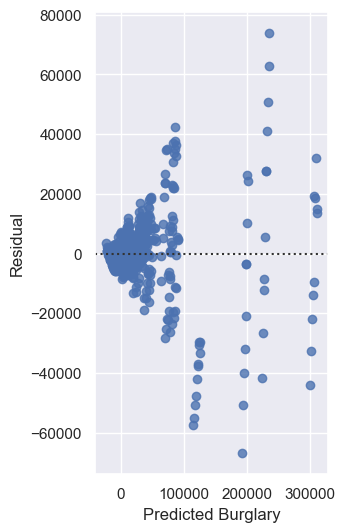

In [44]:
inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual")

# Now plot predicted vs actual when using income to predict burglary

In [45]:
X_inc_burg_test2 = X_inc_burg_test
X_inc_burg_test2['actual_burglary'] = y_inc_burg_test
X_inc_burg_test2['preds_burglary'] = inc_burg_preds
inc_burg_melt = pd.melt(X_inc_burg_test2, id_vars=['const','Year', 'Median_Income', 'actual_burglary','preds_burglary'], \
                       var_name = 'State', value_name='Binary')
inc_burg_melt = inc_burg_melt[ inc_burg_melt['Binary']==1]
inc_burg_melt.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
40,1.0,2010,57848.0,3105,-8859.821045,Alaska,1
90,1.0,2011,57431.0,2852,-9539.190170,Alaska,1
140,1.0,2012,63648.0,2950,-11967.147964,Alaska,1
190,1.0,2013,61137.0,2917,-12094.580900,Alaska,1
229,1.0,2013,72472.0,2917,-15082.258405,Alaska,1


In [46]:
chosen_stats_burglary = duckdb.sql(''' SELECT * FROM inc_burg_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_burglary.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
0,1.0,2014,57522.0,5765,-12059.917833,Delaware,1
1,1.0,2015,57756.0,4797,-12910.877434,Delaware,1
2,1.0,2016,58046.0,5028,-13776.597507,Delaware,1
3,1.0,2017,62318.0,3960,-15691.892510,Delaware,1
4,1.0,2018,65012.0,3154,-17191.258522,Delaware,1


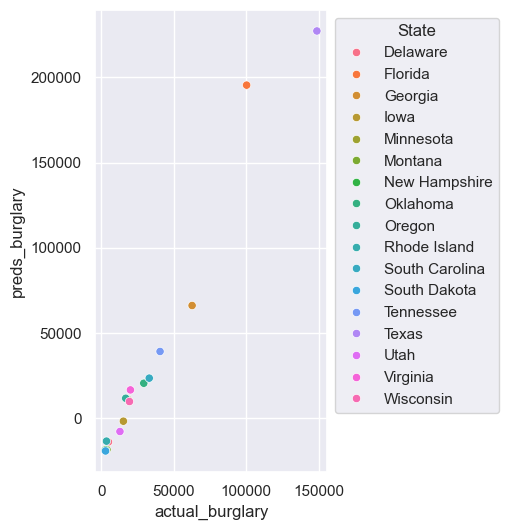

In [47]:
burglary_2016 = chosen_stats_burglary[chosen_stats_burglary['Year']==2016]
ax = sns.scatterplot(data = burglary_2016, x = 'actual_burglary', y = 'preds_burglary', hue = 'State')
sns.set_theme(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

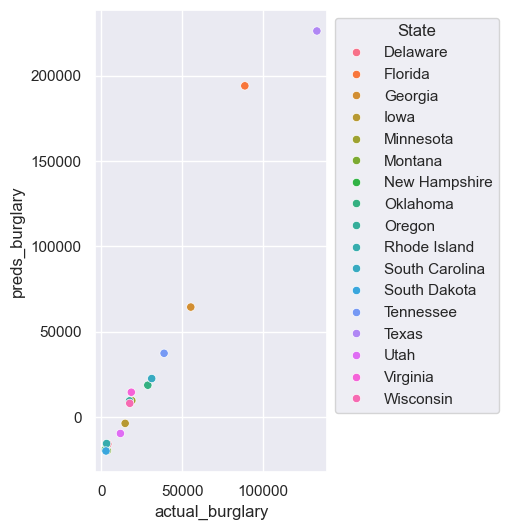

In [48]:
burglary_2017 = chosen_stats_burglary[chosen_stats_burglary['Year']==2017]
ax = sns.scatterplot(data = burglary_2017, x = 'actual_burglary', y = 'preds_burglary', hue = 'State')
sns.set_theme(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

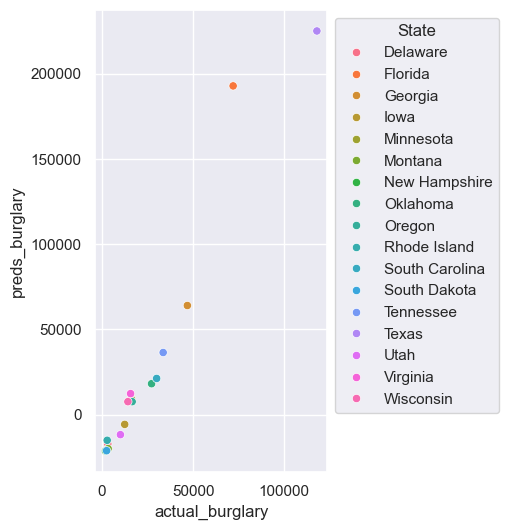

In [49]:
burglary_2018 = chosen_stats_burglary[chosen_stats_burglary['Year']==2018]
ax = sns.scatterplot(data = burglary_2018, x = 'actual_burglary', y = 'preds_burglary', hue = 'State')
sns.set_theme(rc={'figure.figsize':(3, 6)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Hypothesis 2

### States that are below the U.S unemployment average over the years 1980 to 2018 are more accurate in predicting violent crime than those below the national average

In [50]:
#avg unemployment in the US
us_avg = job_df.iloc[0, 1:]
#print(us_avg)
us_average = us_avg.sum()/us_avg.size
print(us_average)

6.264102564102564


In [51]:
#created a dictionary with all states and their respective unemployment averages across the years 1980 to 2018
dict_avg = {}
states = job_df.iloc[1:, 0].reset_index(drop=True) #rows 0,1,...50
#print(states)

#for x in range(1, 38):
for x in range(0,states.size):
    the_avg = job_df.iloc[x+1, 1:] #get the row for this state
    dict_avg[states[x]] = the_avg.sum()/(2018-1980) + 1

print(dict_avg)


{'Alabama': 8.339473684210525, 'Alaska': 8.976315789473684, 'Arizona': 7.371052631578947, 'Arkansas': 7.628947368421051, 'California': 8.39736842105263, 'Colorado': 6.46578947368421, 'Connecticut': 6.518421052631578, 'Delaware': 6.278947368421052, 'District of Columbia': 8.736842105263161, 'Florida': 7.197368421052631, 'Georgia': 7.1236842105263145, 'Hawaii': 5.7026315789473685, 'Idaho': 7.094736842105262, 'Illinois': 8.157894736842106, 'Indiana': 7.342105263157896, 'Iowa': 5.755263157894736, 'Kansas': 5.88157894736842, 'Kentucky': 8.06578947368421, 'Louisiana': 8.507894736842106, 'Maine': 6.776315789473684, 'Maryland': 6.360526315789474, 'Massachusetts': 6.457894736842107, 'Michigan': 9.092105263157896, 'Minnesota': 5.978947368421053, 'Mississippi': 8.807894736842107, 'Missouri': 7.123684210526315, 'Montana': 6.8921052631578945, 'Nebraska': 4.6421052631578945, 'Nevada': 7.75, 'New Hampshire': 5.3578947368421055, 'New Jersey': 7.221052631578949, 'New Mexico': 7.849999999999999, 'New Yo

In [52]:
less_dict = []
more_dict = []
count = 2
dict_avg[states[count]]

for x in dict_avg:
    rate = dict_avg[x]
    if rate < us_average:
        less_dict.append(x)
    else:
        more_dict.append(x)

print(less_dict)
print(more_dict)


['Hawaii', 'Iowa', 'Kansas', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia', 'Wisconsin']


In [53]:
#now get the info for states that have above average
states_above_df = job_melt[ job_melt['Area'].isin(more_dict)]
states_above_df.head()

,Area,Year,UnemploymentRate
1,Alabama,1980,8.9
2,Alaska,1980,9.6
3,Arizona,1980,6.6
4,Arkansas,1980,7.6
5,California,1980,6.8


In [54]:
states_above_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_above_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_above_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,1919,Alaska,1980,9.6
1,17320,Alabama,1980,8.9
2,7656,Arkansas,1980,7.6
3,210290,California,1980,6.8
4,15215,Colorado,1980,5.8


In [55]:
states_above_df = pd.get_dummies(states_above_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_above_df['Year'] = states_above_df['Year'].astype(int)
states_above_df.head()

,Violent_Crime,Year,UnemploymentRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin
0,1919,1980,9.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17320,1980,8.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7656,1980,7.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210290,1980,6.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15215,1980,5.8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Actually train the model for years 1980-2018; income and violent crime rate for states above average

In [56]:
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(states_above_df.iloc[:, 1:],states_above_df['Violent_Crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()
#model.summary()

In [57]:
X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})
y_above_df.head()

,Preds,Actual
1064,7026.161604,7866
1065,-281.314908,5048
1066,123445.548808,94087
1067,-693.544532,3348
1068,83410.052612,53556


In [58]:
print( f"MAE for predicting violent crime rate using states above national average: {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: {root_mean_squared_error(preds_above,Y_test_above)}")

MAE for predicting violent crime rate using states above national average: 7915.812378514593
RSME for predicting violent crime rate using states above national average: 15479.31569571315


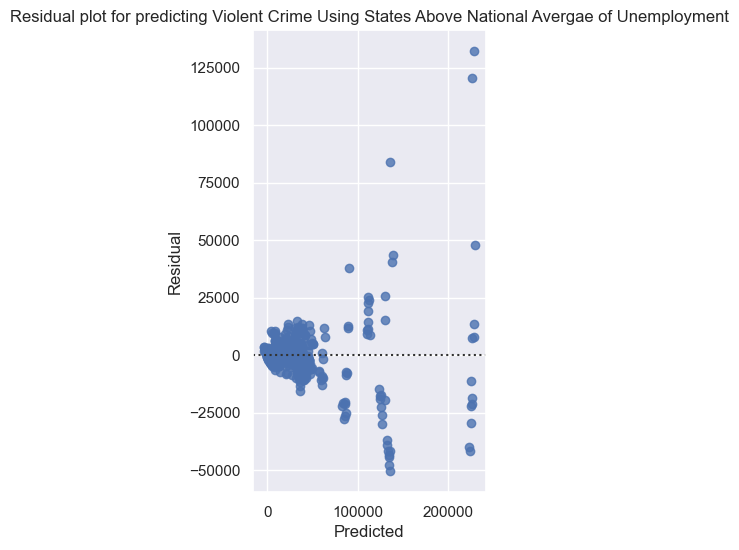

In [59]:
ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual plot for predicting Violent Crime Using States Above National Avergae of Unemployment");

In [60]:
#heatmap for actual values


# Now train model for years 1980-2018; states with unemployment rate below average, violent crime rate

In [61]:
states_below_df = job_melt[ job_melt['Area'].isin(less_dict)]
states_below_df.head()

,Area,Year,UnemploymentRate
12,Hawaii,1980,5.0
16,Iowa,1980,6.0
17,Kansas,1980,4.4
24,Minnesota,1980,5.8
28,Nebraska,1980,3.9


In [62]:
states_below_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_below_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_below_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,9168,Kansas,1980,4.4
1,352,North Dakota,1980,4.9
2,3512,Nebraska,1980,3.9
3,4425,Utah,1980,6.2
4,16355,Virginia,1980,5.2


In [63]:
states_below_df = pd.get_dummies(states_below_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_below_df['Year'] = states_below_df['Year'].astype(int)
states_below_df.head()

,Violent_Crime,Year,UnemploymentRate,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming
0,9168,1980,4.4,0,1,0,0,0,0,0,0,0,0,0
1,352,1980,4.9,0,0,0,0,0,1,0,0,0,0,0
2,3512,1980,3.9,0,0,0,1,0,0,0,0,0,0,0
3,4425,1980,6.2,0,0,0,0,0,0,0,1,0,0,0
4,16355,1980,5.2,0,0,0,0,0,0,0,0,0,1,0


In [64]:
X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:],
                   states_below_df['Violent_Crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()
#model.summary()

In [65]:
X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

,Preds,Actual
327,1446.261847,775
328,2184.911415,1212
329,3798.416198,3362
330,8725.378708,8484
331,11175.272298,10235


In [66]:
print( f"MAE for predicting violent crime rate using states below national average: {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: {root_mean_squared_error(preds_below,Y_test_below)}")

MAE for predicting violent crime rate using states below national average: 877.0012541509234
RSME for predicting violent crime rate using states below national average: 1236.8501710792377


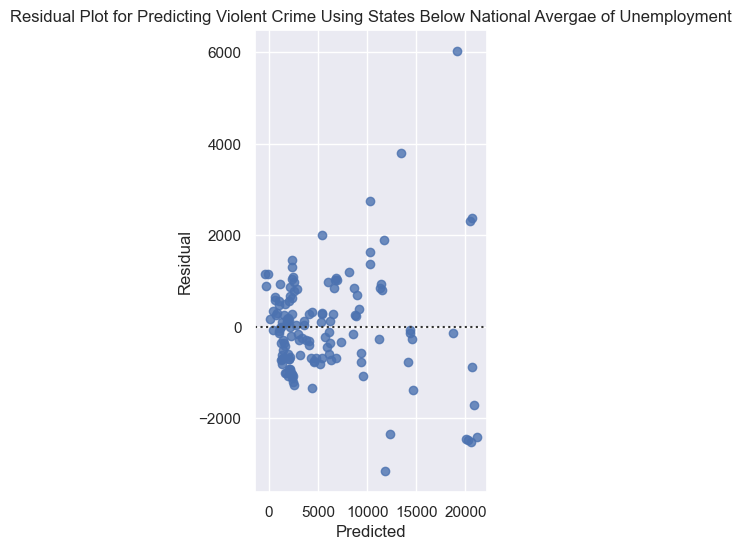

In [67]:
ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual Plot for Predicting Violent Crime Using States Below National Avergae of Unemployment");

# Hypothesis 3
Income, population, unemployment and poverty can best determine the sub-category of homicide within the 4 categories of violent crime for each state regardless of year


In [68]:
crime_job = duckdb.sql('''SELECT C.State, C.Year, UnemploymentRate,
                               C.Population,
                               FROM crime_df AS C
                               JOIN job_melt AS J ON
                               C.Year = J.Year AND J.Area = C.State
                               ''').df()
cj_poverty = duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent
                               FROM crime_job AS C
                               JOIN poverty_concat AS P ON
                               C.Year = P.Year AND C.State = P.State
                               ''').df()
four_factors= duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent,
                        Median_Income
                               FROM cj_poverty AS C
                               JOIN income_melt AS I ON
                               C.Year = I.Year AND C.State = I.State
                               ORDER BY C.Year ASC''').df()
four_factors.head() #2013 - 2018

,State,Year,Population,UnemploymentRate,PovertyPercent,Median_Income
0,Alabama,2013,4833996,7.2,16.7,47320.0
1,Alaska,2013,737259,7.0,10.9,72472.0
2,Arizona,2013,6634997,7.7,20.2,52611.0
3,Arkansas,2013,2958765,7.2,17.1,39376.0
4,California,2013,38431393,8.9,14.9,60794.0


# MODEL FOR RAPE

In [69]:
rape_fourfactors= duckdb.sql('''SELECT C.Rape, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
rape_fourfactors = pd.get_dummies(rape_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(rape_fourfactors)
X4_train_rape, X4_test_rape, Y4_train_rape, Y4_test_rape = \
  train_test_split(rape_fourfactors.iloc[:,1:], rape_fourfactors['Rape'],\
                   test_size=.30, shuffle=False)
X4_train_rape = sm.add_constant(X4_train_rape)
model_rape = sm.OLS(Y4_train_rape,X4_train_rape).fit()
#model_rape.summary()

In [70]:
#make predictions using rape model
X4_test_rape = sm.add_constant(X4_test_rape)
rape4_preds = model_rape.predict(X4_test_rape)
print( f"MAE for predicting rape using the four factors: {mean_absolute_error(Y4_test_rape, rape4_preds)}")
print( f"RSME for predicting rape using the four factors: {root_mean_squared_error(Y4_test_rape, rape4_preds)}")

MAE for predicting rape using the four factors: 311.5111383524392
RSME for predicting rape using the four factors: 513.7375186153721


## MODEL FOR HOMICIDE

In [71]:
homicide_fourfactors= duckdb.sql('''SELECT C.Homicide, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
homicide_fourfactors = pd.get_dummies(homicide_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(homicide_fourfactors)

X4_train_homi, X4_test_homi, Y4_train_homi, Y4_test_homi = \
  train_test_split(homicide_fourfactors.iloc[:,1:], homicide_fourfactors['Homicide'],\
                   test_size=.30, shuffle=False)
X4_train_homi = sm.add_constant(X4_train_homi)
model_homicide = sm.OLS(Y4_train_homi,X4_train_homi).fit()
#model_homicide.summary()

In [72]:
#make predictions using homicide model
X4_test_homi = sm.add_constant(X4_test_homi)
homicide4_preds = model_homicide.predict(X4_test_homi)
print( f"MAE for predicting homicide using the four factors: {mean_absolute_error( Y4_test_homi,homicide4_preds)}")
print( f"RSME for predicting homicide using the four factors: {root_mean_squared_error(Y4_test_homi, homicide4_preds)}")

MAE for predicting homicide using the four factors: 56.87366280713931
RSME for predicting homicide using the four factors: 71.35952922187123


# MODEL FOR AGGRAVATED ASSAULT

In [73]:
assault_fourfactors= duckdb.sql('''SELECT C.Aggravated_Assault, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
assault_fourfactors = pd.get_dummies(assault_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(assault_fourfactors)

X4_train_assault, X4_test_assault, Y4_train_assault, Y4_test_assault = \
  train_test_split(assault_fourfactors.iloc[:,1:], assault_fourfactors['Aggravated_Assault'],\
                   test_size=.30, shuffle=False)
X4_train_assault = sm.add_constant(X4_train_assault)
model_assault = sm.OLS(Y4_train_assault,X4_train_assault).fit()
#model_homicide.summary()

In [74]:
#make predictions using assault model
X4_test_assault = sm.add_constant(X4_test_assault)
assault4_preds = model_assault.predict(X4_test_assault)
print( f"MAE for predicting aggravated assault using the four factors: {mean_absolute_error( Y4_test_assault,assault4_preds)}")
print( f"RSME for predicting aggravated assault using the four factors: {root_mean_squared_error(Y4_test_assault,assault4_preds)}")

MAE for predicting aggravated assault using the four factors: 1381.4995644397807
RSME for predicting aggravated assault using the four factors: 2261.3542980047837


# MODEL FOR ROBBERY

In [76]:
robbery_fourfactors= duckdb.sql('''SELECT C.Robbery, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
robbery_fourfactors = pd.get_dummies(robbery_fourfactors , prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(burglary_fourfactors)

X4_train_robbery, X4_test_robbery, Y4_train_robbery, Y4_test_robbery = \
  train_test_split(robbery_fourfactors .iloc[:,1:], robbery_fourfactors ['Robbery'],\
                   test_size=.30, shuffle=False)
X4_train_robbery = sm.add_constant(X4_train_robbery)
model_robbery = sm.OLS(Y4_train_robbery,X4_train_robbery).fit()
#model_homicide.summary()

In [77]:
#make predictions using burglary model
X4_test_robbery = sm.add_constant(X4_test_robbery)
robbery4_preds = model_robbery.predict(X4_test_robbery)
print( f"MAE for predicting robbery using the four factors: {mean_absolute_error( Y4_test_robbery,robbery4_preds)}")
print( f"RSME for predicting robbery using the four factors: {root_mean_squared_error(Y4_test_robbery,robbery4_preds)}")

MAE for predicting robbery using the four factors: 922.7968416893488
RSME for predicting robbery using the four factors: 1557.5517439986706
